In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [5]:
# Specify the pattern to match your CSV files
file_pattern = 'mkl_double_*.csv'  # Update with the appropriate pattern

# Get a list of file paths matching the pattern
file_paths = glob.glob(file_pattern)

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each file and read it into a DataFrame, then add it to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df_temp = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
df_double  = df_temp.sort_values(by = 'Size')
df_double['name'] = 'MKL'

In [7]:
# Specify the pattern to match your CSV files
file_pattern = 'oblas_double*.csv'  # Update with the appropriate pattern

# Get a list of file paths matching the pattern
file_paths = glob.glob(file_pattern)

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each file and read it into a DataFrame, then add it to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df_temp = pd.concat(dfs, ignore_index=True)
df_temp = df_temp.sort_values(by = 'Size')
df_temp['name'] = "OpenBLAS"

In [8]:
df_double = pd.concat([df_double, df_temp])
print(df_double)

     Size       Time      GFLOPS      name
5    2000   0.087559  182.732924       MKL
6    2000   0.066871  239.265979       MKL
7    2000   0.066344  241.167697       MKL
8    2000   0.067347  237.575291       MKL
9    2000   0.067598  236.691667       MKL
..    ...        ...         ...       ...
60  20000  18.699675  855.629822  OpenBLAS
61  20000  21.619887  740.059381  OpenBLAS
62  20000  18.298057  874.409764  OpenBLAS
63  20000  18.241247  877.133017  OpenBLAS
64  20000  19.727962  811.031585  OpenBLAS

[190 rows x 4 columns]


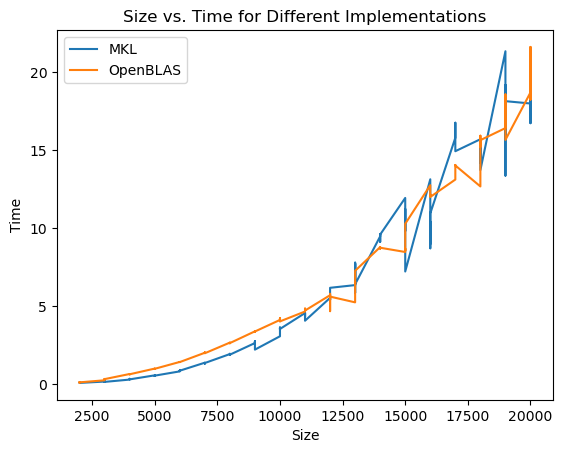

In [9]:
grouped = df_double.groupby('name')
fig, ax = plt.subplots()

# Plot a line for each group
for name, group in grouped:
    if name != 'Rownumber':
        ax.plot(group['Size'], group['Time'], label=name)  # Change 'Time' to 'GFLOPS' for a different plot

# Add labels and legend
ax.set_xlabel('Size')
ax.set_ylabel('Time')  # Change 'Time' to 'GFLOPS' for a different plot
ax.set_title('Size vs. Time for Different Implementations')
ax.legend()

# Show the plot
plt.show()

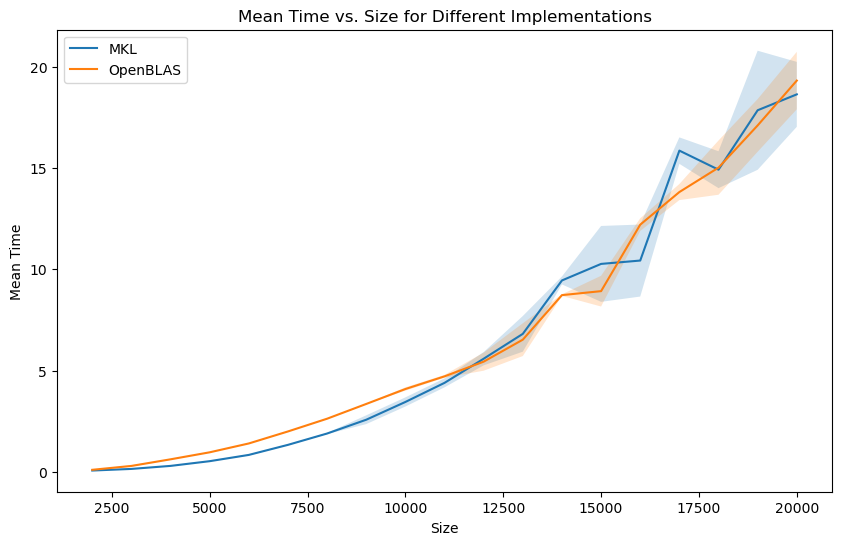

In [10]:
# Group the DataFrame by the 'name' and 'Size' columns
grouped = df_double.groupby(['name', 'Size'])

# Calculate the mean, minimum, and maximum of 'Time' for each group
agg_df = grouped['Time'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
for name, group in agg_df.groupby('name'):
    plt.plot(group['Size'], group['mean'], label=name)
    plt.fill_between(group['Size'],
                     group['mean'] - group['std'],
                     group['mean'] + group['std'],
                     alpha=0.2)

# Add labels and legend
plt.title('Mean Time vs. Size for Different Implementations')
plt.xlabel('Size')
plt.ylabel('Mean Time')
plt.legend()

# Show the plot
plt.show()